In [27]:
import mglearn
import matplotlib.pyplot as plt

In [2]:
import sys
import pandas as pd
import matplotlib 
import numpy as np 
import scipy as sc
import IPython 
import sklearn

X.shape: (26, 2)


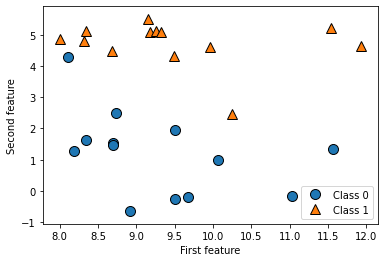

In [7]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

Text(0, 0.5, 'Целевая переменная')

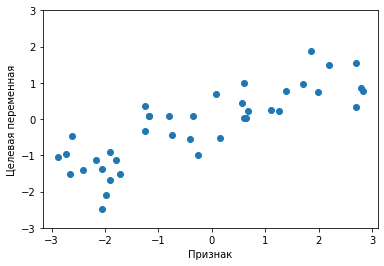

In [9]:
X, y = mglearn.datasets.make_wave(n_samples=40) 
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")

In [11]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
print("Ключи cancer(): \n{}".format(cancer.keys()))

Ключи cancer(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [12]:
print("Форма массива data для набора cancer: {}".format(cancer.data.shape))

Форма массива data для набора cancer: (569, 30)


In [16]:
print("Количество примеров для каждого класса:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Количество примеров для каждого класса:
{'malignant': 212, 'benign': 357}


In [17]:
print("Имена признаков:\n{}".format(cancer.feature_names))

Имена признаков:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [18]:
from sklearn.datasets import load_boston
boston = load_boston()
print("форма массива data для набора boston: {}".format(boston.data.shape))

форма массива data для набора boston: (506, 13)


In [20]:
# данных c производными признаками можно загрузить с помощью функции 
X, y = mglearn.datasets.load_extended_boston() 
print("форма массива X: {}".format(X.shape))


форма массива X: (506, 104)


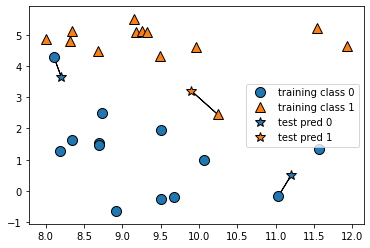

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

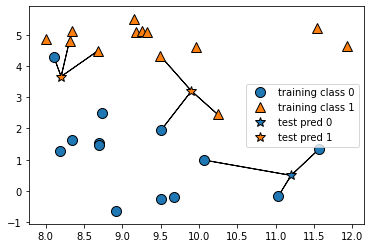

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [8]:
from sklearn.model_selection import train_test_split 
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=3)

In [10]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
print("Прогнозы на тестовом наборе: {}".format(clf.predict(X_test)))

Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]


In [12]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(X_test, y_test)))

Правильность на тестовом наборе: 0.86


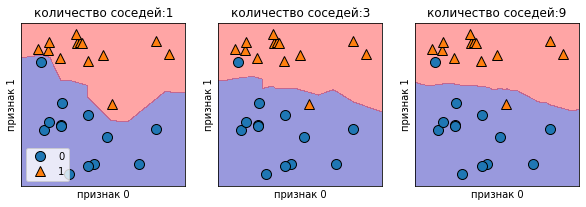

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
     # создаем объект-классификатор и подгоняем в одной строке
     clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) 
     mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
     mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax) 
     ax.set_title("количество соседей:{}".format(n_neighbors)) 
     ax.set_xlabel("признак 0")
     ax.set_ylabel("признак 1") 
     axes[0].legend(loc=3)


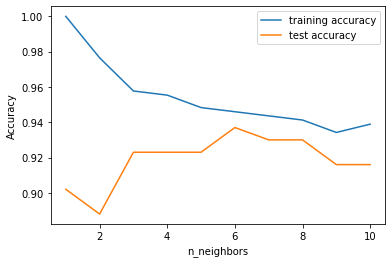

In [33]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

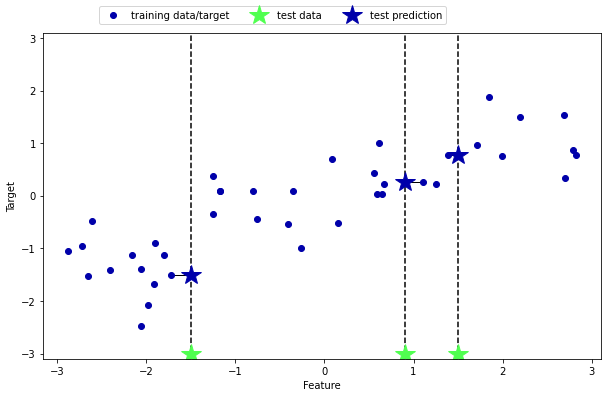

In [34]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

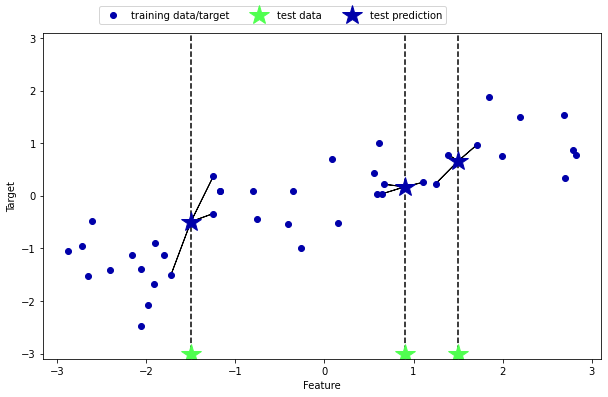

In [35]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [36]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [37]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [38]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


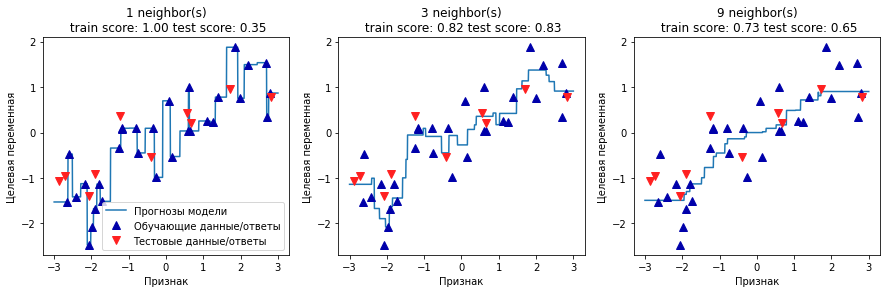

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3 
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # получаем прогнозы, используя 1, 3, и 9 соседей
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train),reg.score(X_test, y_test)))
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы","Тестовые данные/ответы"], loc="best")

w[0]: 0.393906  b: -0.031804


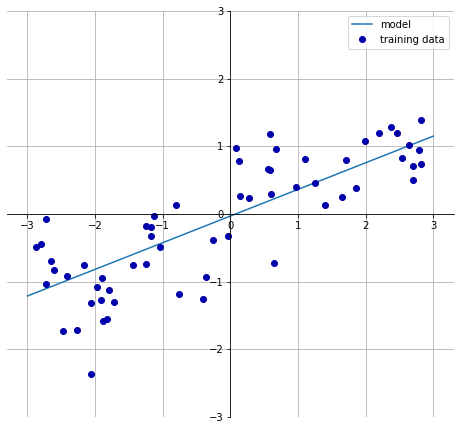

In [41]:
mglearn.plots.plot_linear_regression_wave()

In [42]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [44]:
print("lr.coef_: {}".format(lr.coef_)) 
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [45]:
print("R-квадрат на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train))) 
print("R-квадрат на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

R-квадрат на обучающем наборе: 0.67
R-квадрат на тестовом наборе: 0.66


In [46]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
lr = LinearRegression().fit(X_train, y_train)

In [47]:
print("R-квадрат на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train))) 
print("R-квадрат на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

R-квадрат на обучающем наборе: 0.95
R-квадрат на тестовом наборе: 0.61


In [48]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train))) 
print("R-квадрат на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

R-квадрат на обучающем наборе: 0.89
R-квадрат на тестовом наборе: 0.75


In [53]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train))) 
print("R-квадрат на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))

R-квадрат на обучающем наборе: 0.79
R-квадрат на тестовом наборе: 0.64


In [56]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train))) 
print("R-квадрат на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test)))


R-квадрат на обучающем наборе: 0.93
R-квадрат на тестовом наборе: 0.77


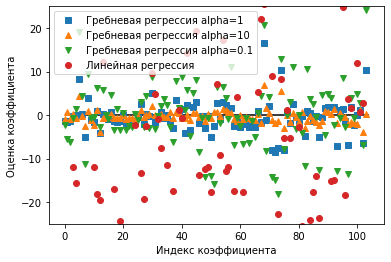

In [57]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1") 
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10") 
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия") 
plt.xlabel("Индекс коэффициента") 
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25) 
plt.legend()


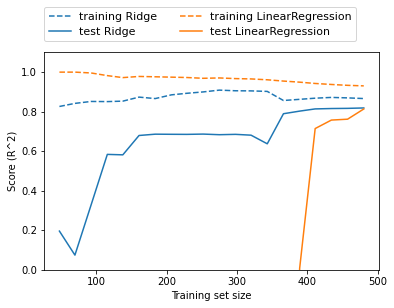

In [58]:
mglearn.plots.plot_ridge_n_samples()